In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine

In [3]:
df = pd.read_csv('202110-divvy-tripdata.csv')
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member


### Filling missing data

In [4]:
df['start_station_name'] = df.groupby(
        ['start_lat', 'start_lng']
    )['start_station_name'].transform(
        lambda x: x[x.notnull()].iloc[0] if len(x[x.notnull()]) > 0 else 'UNKNOWN'
        )
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,UNKNOWN,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,UNKNOWN,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,UNKNOWN,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member


In [5]:
stations = df.groupby('start_station_name').apply(lambda x: x['start_lat'].mean())
stations = stations.to_frame()
stations.columns = ['lat']
stations['lng'] = df.groupby('start_station_name').apply(lambda x: x['start_lng'].mean())
stations

,lat,lng
start_station_name,,
2112 W Peterson Ave,41.991169,-87.683590
63rd St Beach,41.780920,-87.576313
900 W Harrison St,41.874752,-87.649807
Aberdeen St & Jackson Blvd,41.877734,-87.654808
Aberdeen St & Monroe St,41.880418,-87.655557
...,...,...
Woodlawn Ave & 55th St,41.795272,-87.596469
Woodlawn Ave & 75th St,41.759188,-87.595753
Woodlawn Ave & Lake Park Ave,41.814090,-87.597015


In [6]:
def get_closer(record):
    min_val = None
    name = None
    for i, val in stations.iterrows():
        current_val = np.sqrt( (record['start_lat'] - val['lat'])**2 + (record['start_lng'] - val['lng'])**2 )
        if min_val is None or current_val < min_val:
            min_val = current_val
            name = i
    if name is None:
        return 'UNKNOWN'
    
    record['start_station_name'] = name
    return record['start_station_name']
        

In [7]:
df.loc[
    df['start_station_name'] == 'UNKNOWN',
    'start_station_name'
    ] = df[df['start_station_name'] == 'UNKNOWN'].apply(get_closer, axis=1)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,NaN,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,NaN,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,NaN,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,NaN,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member


In [29]:
# Drop values that are not in the stations list (it's something like 0.1% of the data)
df = df[df['start_station_name'] != 'UNKNOWN']

In [31]:
# Get a stations list from the data
stations = pd.DataFrame(df.groupby('start_station_name').apply(
    lambda x: x['start_station_id'][x['start_station_id'].notnull()].iloc[0] if len(x['start_station_id'][x['start_station_id'].notnull()]) > 0 else 'UNKNOWN'))
stations = stations.reset_index()
stations = stations.rename(columns={0:'start_station_id'})
stations


,start_station_name,start_station_id
0,2112 W Peterson Ave,KA1504000155
1,63rd St Beach,15491
2,900 W Harrison St,13028
3,Aberdeen St & Jackson Blvd,13157
4,Aberdeen St & Monroe St,13156
...,...,...
764,Woodlawn Ave & 55th St,TA1307000164
765,Woodlawn Ave & 75th St,569
766,Woodlawn Ave & Lake Park Ave,KA1503000065
767,Yates Blvd & 75th St,KA1503000024


In [41]:
# Fill missing id start
df['start_station_id'] = df.groupby('start_station_name', as_index=False)['start_station_name'].transform(
    lambda x: stations[stations['start_station_name'] == x.iloc[0]]['start_station_id'].iloc[0] if len(stations[stations['start_station_name'] == x.iloc[0]]['start_station_id']) > 0 else 'UNKNOWN'
    )
df

C:\Users\t470p\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,15645,NaN,NaN,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,428,NaN,NaN,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,13242,NaN,NaN,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,KA1504000106,NaN,NaN,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member


In [42]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name         0
start_station_id           0
end_station_name      114766
end_station_id        114766
start_lat                  0
start_lng                  0
end_lat                  484
end_lng                  484
member_casual              0
dtype: int64

In [46]:
stations = df.groupby('end_station_name').apply(lambda x: x['start_lat'].mean())
stations = stations.to_frame()
stations.columns = ['lat']
stations['lng'] = df.groupby('end_station_name').apply(lambda x: x['start_lng'].mean())
stations

def get_closer_end_station(record):
    min_val = None
    name = None
    for i, val in stations.iterrows():
        current_val = np.sqrt( (record['end_lat'] - val['lat'])**2 + (record['end_lng'] - val['lng'])**2 )
        if min_val is None or current_val < min_val:
            min_val = current_val
            name = i
    if name is None:
        return 'UNKNOWN'
    
    record['end_station_name'] = name
    return record['end_station_name']

In [47]:
# same process for end station
df.loc[
    df['end_station_name'].isnull(),
    'end_station_name'
    ] = df[df['end_station_name'].isnull()].apply(get_closer_end_station, axis=1)
df

C:\Users\t470p\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,Field Blvd & South Water St,NaN,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,15645,Kostner Ave & Wrightwood Ave,NaN,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Cuyler Ave,NaN,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,13242,Kedzie Ave & Palmer Ct,NaN,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,KA1504000106,Conservatory Dr & Lake St,NaN,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,TA1307000124,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,TA1307000124,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,TA1307000124,41.854184,-87.619154,41.864059,-87.623727,member


In [52]:
# Get a stations list from the data
stations = pd.DataFrame(df.groupby('end_station_name').apply(
    lambda x: x['start_station_id'][x['end_station_id'].notnull()].iloc[0] if len(x['end_station_id'][x['end_station_id'].notnull()]) > 0 else 'UNKNOWN'))
stations = stations.reset_index()
stations = stations.rename(columns={0:'end_station_id'})
# Fill missing id start
df['end_station_id'] = df.groupby('end_station_name', as_index=False)['end_station_name'].transform(
    lambda x: stations[stations['end_station_name'] == x.iloc[0]]['end_station_id'].iloc[0] if len(stations[stations['end_station_name'] == x.iloc[0]]['end_station_id']) > 0 else 'UNKNOWN'
    )
df

C:\Users\t470p\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,Field Blvd & South Water St,13006,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,15645,Kostner Ave & Wrightwood Ave,355,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Cuyler Ave,KA1706005015,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,13242,Kedzie Ave & Palmer Ct,13224,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,KA1504000106,Conservatory Dr & Lake St,SL-011,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,13263,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,13263,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854184,-87.619154,41.864059,-87.623727,member


In [54]:
# drop missing latitude and long 
df = df[df['end_lat'].notnull()]
df = df[df['end_lng'].notnull()]
df


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,Field Blvd & South Water St,13006,41.889186,-87.638495,41.890000,-87.630000,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,15645,Kostner Ave & Wrightwood Ave,355,41.930000,-87.700000,41.930000,-87.710000,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Cuyler Ave,KA1706005015,41.920000,-87.700000,41.940000,-87.720000,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,13242,Kedzie Ave & Palmer Ct,13224,41.920000,-87.690000,41.920000,-87.690000,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,KA1504000106,Conservatory Dr & Lake St,SL-011,41.890000,-87.710000,41.890000,-87.690000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,13263,41.896747,-87.635668,41.864059,-87.623727,casual
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,13263,41.892278,-87.612043,41.864059,-87.623727,casual
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854055,-87.619187,41.864009,-87.623601,member
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854184,-87.619154,41.864059,-87.623727,member


In [88]:
# ride duration in hours
df['ride_duration'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds() / 3600
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,distance
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,Field Blvd & South Water St,13006,41.889186,-87.638495,41.890000,-87.630000,member,0.052222,0.709017
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,15645,Kostner Ave & Wrightwood Ave,355,41.930000,-87.700000,41.930000,-87.710000,member,0.026944,0.827249
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Cuyler Ave,KA1706005015,41.920000,-87.700000,41.940000,-87.720000,member,0.129722,2.771841
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,13242,Kedzie Ave & Palmer Ct,13224,41.920000,-87.690000,41.920000,-87.690000,member,0.020833,0.000000
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,KA1504000106,Conservatory Dr & Lake St,SL-011,41.890000,-87.710000,41.890000,-87.690000,member,0.137778,1.655535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,13263,41.896747,-87.635668,41.864059,-87.623727,casual,0.372222,3.766774
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,13263,41.892278,-87.612043,41.864059,-87.623727,casual,0.376111,3.283539
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854055,-87.619187,41.864009,-87.623601,member,0.092500,1.165657
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854184,-87.619154,41.864059,-87.623727,member,0.091111,1.161508


In [82]:
df['distance'] = df.apply(lambda x: haversine((x['start_lat'],x['start_lng']), (x['end_lat'], x['end_lng'])) , axis=1)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,distance
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,Field Blvd & South Water St,13006,41.889186,-87.638495,41.890000,-87.630000,member,0,0.709017
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,15645,Kostner Ave & Wrightwood Ave,355,41.930000,-87.700000,41.930000,-87.710000,member,0,0.827249
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Cuyler Ave,KA1706005015,41.920000,-87.700000,41.940000,-87.720000,member,0,2.771841
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,13242,Kedzie Ave & Palmer Ct,13224,41.920000,-87.690000,41.920000,-87.690000,member,0,0.000000
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,KA1504000106,Conservatory Dr & Lake St,SL-011,41.890000,-87.710000,41.890000,-87.690000,member,0,1.655535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,13263,41.896747,-87.635668,41.864059,-87.623727,casual,0,3.766774
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,13263,41.892278,-87.612043,41.864059,-87.623727,casual,0,3.283539
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854055,-87.619187,41.864009,-87.623601,member,0,1.165657
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854184,-87.619154,41.864059,-87.623727,member,0,1.161508


In [92]:
# Get day period
df['day_period'] = df.apply(lambda x: 'morning' if pd.to_datetime(x['started_at']).hour < 12 else 'afternoon' if pd.to_datetime(x['started_at']).hour < 18 else 'evening', axis=1)
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,distance,day_period
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,Field Blvd & South Water St,13006,41.889186,-87.638495,41.890000,-87.630000,member,0.052222,0.709017,afternoon
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,Richmond St & Diversey Ave,15645,Kostner Ave & Wrightwood Ave,355,41.930000,-87.700000,41.930000,-87.710000,member,0.026944,0.827249,morning
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,Milwaukee Ave & Fullerton Ave,428,Milwaukee Ave & Cuyler Ave,KA1706005015,41.920000,-87.700000,41.940000,-87.720000,member,0.129722,2.771841,afternoon
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,Milwaukee Ave & Rockwell St,13242,Kedzie Ave & Palmer Ct,13224,41.920000,-87.690000,41.920000,-87.690000,member,0.020833,0.000000,afternoon
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,Kedzie Ave & Lake St,KA1504000106,Conservatory Dr & Lake St,SL-011,41.890000,-87.710000,41.890000,-87.690000,member,0.137778,1.655535,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631221,BA077FDD42DABF12,classic_bike,2021-10-14 21:45:05,2021-10-14 22:07:25,Franklin St & Chicago Ave,13017,Michigan Ave & 14th St,13263,41.896747,-87.635668,41.864059,-87.623727,casual,0.372222,3.766774,evening
631222,B7D99254E798AA6B,classic_bike,2021-10-02 15:28:28,2021-10-02 15:51:02,Streeter Dr & Grand Ave,13022,Michigan Ave & 14th St,13263,41.892278,-87.612043,41.864059,-87.623727,casual,0.376111,3.283539,afternoon
631223,BCCFD66DA466400F,electric_bike,2021-10-08 16:47:10,2021-10-08 16:52:43,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854055,-87.619187,41.864009,-87.623601,member,0.092500,1.165657,afternoon
631224,623E0F6F50CDD6E4,classic_bike,2021-10-08 07:49:47,2021-10-08 07:55:15,Calumet Ave & 21st St,15546,Michigan Ave & 14th St,13263,41.854184,-87.619154,41.864059,-87.623727,member,0.091111,1.161508,morning


# Data Analysis

In [57]:

df['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [72]:
df['ride_duration'].sort_values(ascending=False).head(10)

360554    678
60383     442
587787    377
104100    170
275302    154
90126     136
288379    134
252274    124
60000     124
107965    123
Name: ride_duration, dtype: int32

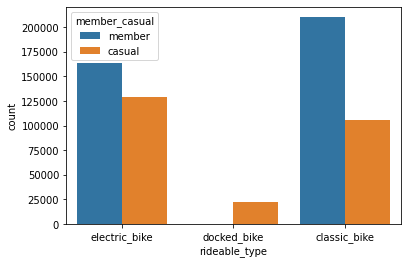

In [74]:
x = sns.countplot(x="rideable_type", hue="member_casual", data=df)

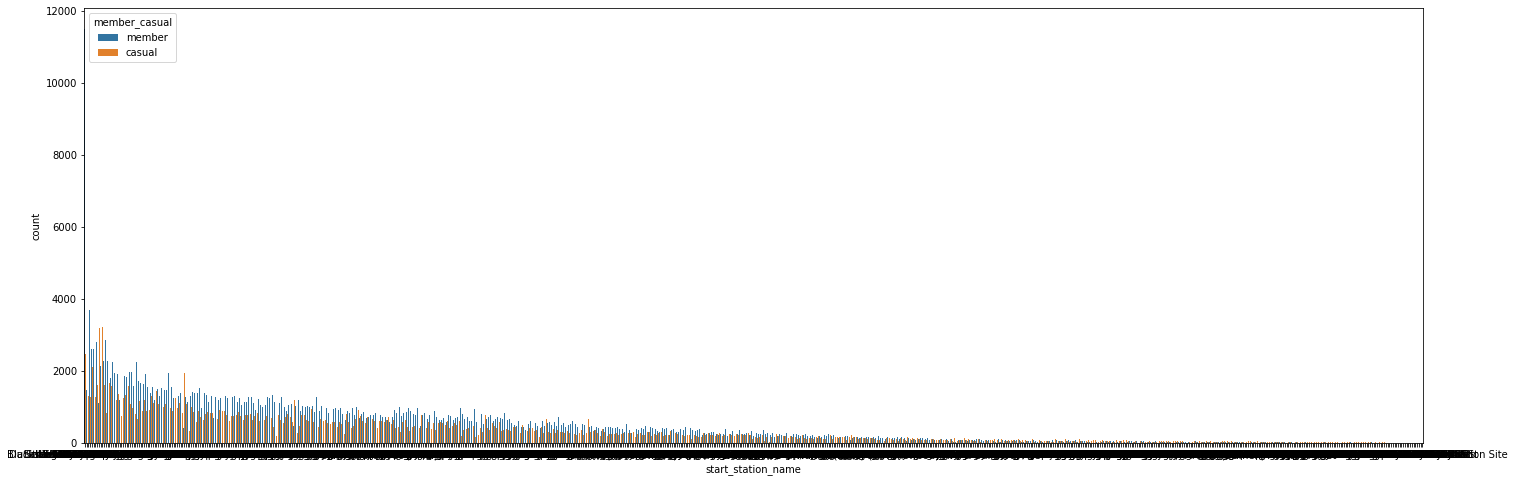

In [79]:
plt.figure(figsize=(24,8))
x = sns.countplot(x="start_station_name", hue="member_casual", data=df, order=df['start_station_name'].value_counts().index)

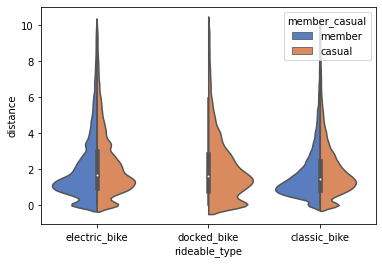

In [84]:
ax = sns.violinplot(x="rideable_type", y="distance", hue="member_casual",
                    data=df[df['distance'] < 10], palette="muted", split=True)

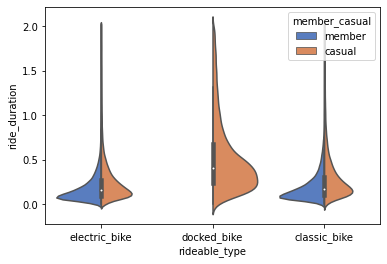

In [89]:
ax = sns.violinplot(x="rideable_type", y="ride_duration", hue="member_casual",
                    data=df[(df['distance'] < 10) & (df['ride_duration'] < 2)], palette="muted", split=True)

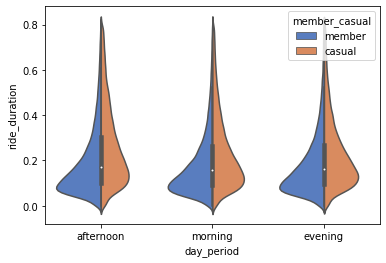

In [95]:
ax = sns.violinplot(x="day_period", y="ride_duration", hue="member_casual",
                    data=df[(df['distance'] < 10) & (df['ride_duration'] < 0.8)], palette="muted", split=True)

In [96]:
df.to_csv('cleaned_data.csv', index=False)